In [3]:
import numpy as np
import matplotlib.pyplot as plt

def intmono(n,m):
    '''
    Calculate the integral of \int_0^1 x^n x^m sin(ln(x+10)) dx
    Method is straight sum (not optimal but fast)

    Parameters
    ----------
    n: int
        exponent of x (first)
    m: int
        exponent of x (second)
        
    Returns
    ----------
    float
        result of integral
        
    '''
    
#   Number of points to perform the integration over
    points = 10000
    x = np.linspace(0,1,points)
#   Create integrand
    wgt = np.sin(np.log(x+1))
    p1 = x**n
    p2 = x**m
    integrand = wgt*p1*p2/points
    
#   Integral is just sum
    return sum(integrand)


def intpoly(L,n,m):
    '''
    Produce a list of all prime numbers less than N

    Parameters
    ----------
    L: array, float
        Coefficents for polynomials
    n: int
        order of first polynomial
    m: int
        order of second polynomial
    Returns
    ----------
    list
        All primes less than N in increasing order
    
    '''
    
#   Number of points to perform the integration over
    points = 10000
    x = np.linspace(0,1,points)
    
#   Create integrand using polynomial generator from numpy
    wgt = np.sin(np.log(x+1))
    p1 = np.poly1d(L[n,::-1])
    p2 = np.poly1d(L[m,::-1])
    integrand = wgt*p1(x)*p2(x)/points
    
#   Integral is just sum
    return sum(integrand)


# Vectorise just converts a scalar function to one that accepts vectors
# Needed for numpy.fromfunction
tmp = np.vectorize(intmono)

# Creates an array with entries calculated from the function
M = np.fromfunction(tmp,(6,6))

# Cholesky decomposition. This is equivalent to Gram-Schmidtt
# orthonormalisation but more stable
L = np.linalg.cholesky(M)

# Calculate inverse
L = np.linalg.inv(L)

# Check polynomials are now orthonormal
I = np.zeros((6,6), dtype='float') 
for i in range(6):
    for j in range(6):
        I[i,j] = intpoly(L,i,j)

# This set global precision level for print statements    
np.set_printoptions(precision=3)
print(M)
print(I)

# ** Note lack of precision with increasing order  **
# ** This is due to inaccurate integration for x^n **
# ** Using quadriture would be better (eg: gauss-  **
# ** legendre) also faster as less points          **
# ** Also could have done it with Legendre as our  **
# ** initial basis and accuracy would have been    **
# ** much better as reduced divergence. Results    **
# ** would have been the same                      **

[[0.37  0.237 0.174 0.137 0.113 0.096]
 [0.237 0.174 0.137 0.113 0.096 0.084]
 [0.174 0.137 0.113 0.096 0.084 0.074]
 [0.137 0.113 0.096 0.084 0.074 0.066]
 [0.113 0.096 0.084 0.074 0.066 0.06 ]
 [0.096 0.084 0.074 0.066 0.06  0.055]]
[[ 1.000e+00  8.052e-16  2.277e-14 -8.507e-14  7.927e-14  6.975e-13]
 [ 8.330e-16  1.000e+00 -1.108e-13  1.208e-13  1.101e-12 -1.119e-11]
 [ 2.277e-14 -1.108e-13  1.000e+00  1.126e-12 -1.144e-11  6.898e-11]
 [-8.502e-14  1.208e-13  1.126e-12  1.000e+00  6.816e-11 -2.952e-10]
 [ 7.927e-14  1.101e-12 -1.144e-11  6.816e-11  1.000e+00  8.176e-10]
 [ 6.975e-13 -1.119e-11  6.898e-11 -2.952e-10  8.176e-10  1.000e+00]]


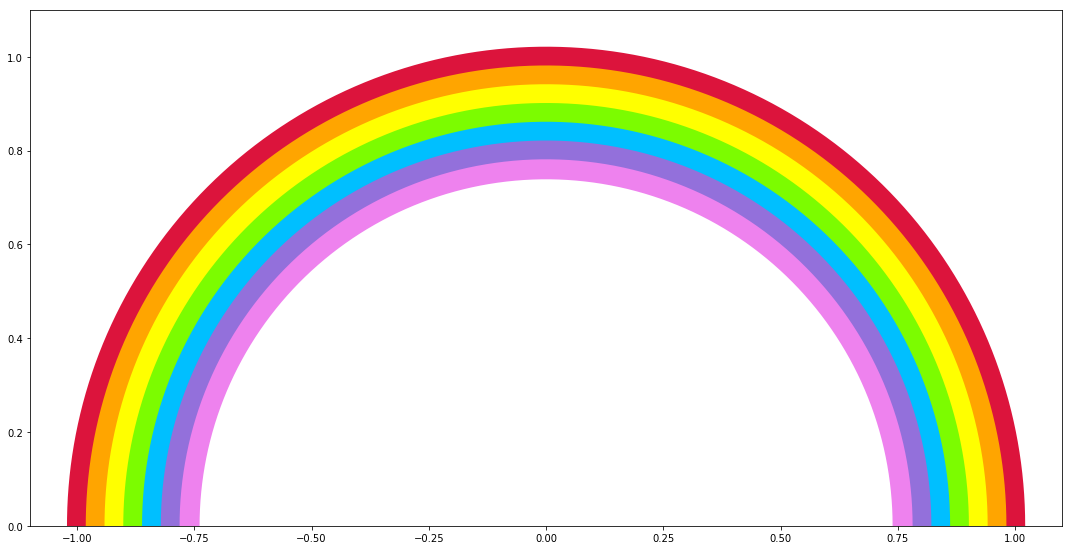

In [20]:
#4.4 Plot Rainbow
import numpy as np
import matplotlib.pyplot as plt

# Using theta makes the ends behave better than
# y = sqrt(r**2 - x**2)
# as points evenly spaced along curve
theta = np.linspace(0,np.pi,1000)

# set increment for radius to be reduced
# for each line.  Also set line width 
# to match increment size so lines always touch
inc = 0.04
wth = int(500*inc)

# create x and y
x = np.cos(theta)
y = np.sin(theta)

# create radius for each line
r = np.linspace(1,1-6*inc,7)

# set colour list
c = ['crimson','orange','yellow','lawngreen','deepskyblue','mediumpurple','violet']

# create figure, size 15x10in
fig = plt.figure(figsize=(15,10))
ax = plt.axes()

# loop over plotting each line
for i in range(7):
    ax.plot(r[i]*x,r[i]*y,linewidth=wth,color=c[i])

# set limits and fix aspect ratio (so circular)
ax.set(xlim=(-1.1,1.1),ylim=(0,1.1),aspect='equal')

# removed extra white space
plt.tight_layout()

[[]]

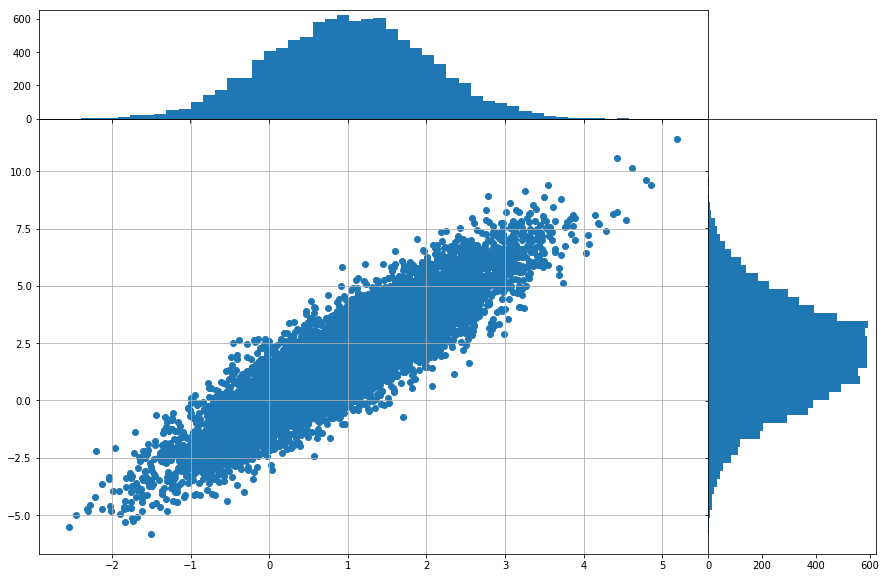

In [6]:
#4.5 Plot Distribution
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs

# Create multivariate gaussian data
mean = [1,2]
covar = [[1,2],[2,5]]
x,y = np.random.multivariate_normal(mean,covar,10000).T

# Create figure using gridspec - no spaces - ratio 4:1
fig = plt.figure(figsize=(15,10))
grid = gs.GridSpec(2,2,wspace=0,hspace=0,width_ratios=[4,1],height_ratios=[1,4])

# Create plots
ax1 = plt.subplot(grid[1,0])
ax2 = plt.subplot(grid[0,0])
ax3 = plt.subplot(grid[1,1])

# Fill plots
ax1.scatter(x,y)
ax2.hist(x,50)
ax3.hist(y,50,orientation='horizontal')

# Add grids and remove ticks for histograms
ax1.grid(True)
ax2.xaxis.set(ticklabels=[])
ax3.yaxis.set(ticklabels=[])

In [11]:
wth = int(2e-1/inc)

In [12]:
wth

10